### <center>**Laptop Pricing Data**</center>

# Objectives

After completing this you will be able to:

 - Handle missing data in different ways
 - Correct the data type of different data values as per requirement
 - Standardize and normalize the appropriate data attributes
 - Visualize the data as grouped bar graph using Binning
 - Cnverting a categorical data into numerical indicator variables


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [8]:
df = pd.read_csv(url)

In [88]:
df.to_csv("laptop_pricing.csv", index=False)
print("Dataset Saved")

Dataset Saved


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [18]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


##### Round of upto 2 decimal places "Screen_Size_cm"

In [21]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Task - 1  
**Evaluate the dataset for missing data** 


In [24]:
missing_data = df.isnull()   # creates a DataFrame of True/False (True = missing)
print(missing_data.head())   # shows first 5 rows of missing data check

# Loop through each column and count how many True/False
for column in missing_data.columns.values.tolist():
    print(column)                              # column name
    print(missing_data[column].value_counts()) # count True/False
    print("")                                  # blank line for readability


   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

# Task 2
**Replace with mean and most frequent value**

In [28]:
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
df["Weight_kg"] = df["Weight_kg"].replace(np.nan, avg_weight)


In [30]:
# replacing missing data with mode
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"] = df["Screen_Size_cm"].replace(np.nan, common_screen_size)

# Task - 3
**Fixing the data types**

In [33]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [35]:
# df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

# Two columns is already in Float if not we convert it into Float

# Task - 4
**Data Standardization**

In [51]:
if "Weight_kg" in df.columns:
    df["Weight_kg"] = df["Weight_kg"] * 2.205
    df = df.rename(columns={'Weight_kg':'Weight_pounds'})

if "Screen_Size_cm" in df.columns:
    df["Screen_Size_cm"] = df["Screen_Size_cm"] / 2.54
    df = df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'})


**Data Normalization**

#### Why Normalization is Needed

- Brings all values to the same scale (0–1).  
- Prevents large values (e.g., RAM in GB) from dominating smaller ones (e.g., CPU in GHz).  
- Helps machine learning models train better and more fairly.  


In [53]:

df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

# Task 05
### Price Binning

- Divide continuous "Price" values into 3 categories: **Low, Medium, High**.  
- Store the result in a new attribute **Price-binned**.  


In [58]:
# Create 3 equal-width bins between min and max of Price
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']

# If you want 3 ranges → you need 4 points: [start, cut1, cut2, end]

In [60]:
# Create new binned column
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)

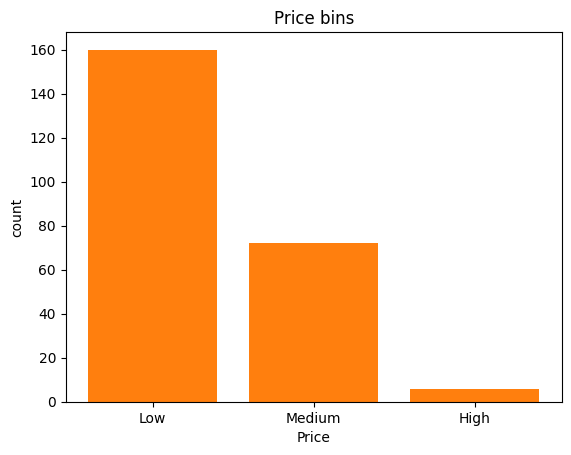

In [64]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")
plt.show()

# Task - 6
**Indicator variables**

Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [70]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)


In [72]:
# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [80]:
df.head(15)
#print(df.head())  this line give me only plain text 

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
5,5,Dell,3,1,1,5,15.598425,0.551724,8,256,4.85100,1016,Low,True,False
6,6,HP,3,3,1,5,15.598425,0.551724,8,256,4.63050,1117,Low,True,False
7,7,Acer,3,2,1,5,15.000000,0.551724,4,256,4.85100,866,Low,False,True
8,8,Dell,3,1,1,5,15.598425,0.862069,4,256,5.07150,812,Low,True,False
9,9,Acer,3,3,1,7,15.000000,0.620690,8,256,4.85100,1068,Low,False,True


In [84]:
df = df.drop(columns=["Unnamed: 0"])

In [86]:
df.to_csv("cleaned_file.csv", index=False)
